In [1]:
%pip -q install yellowbrick
%pip -q install seaborn
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import random
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import joblib
from yellowbrick.classifier import ConfusionMatrix
import seaborn
from sklearn.metrics import confusion_matrix
import numpy
import sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
X = [[0, 0], [1, 1]]
y = [0, 1]

modelo = SVC()
modelo.fit(X,y)

SVC()

In [3]:
modelo.predict([[0,0],[1,0],[0,1],[1,1],[0.49,0.49]])

array([0, 1, 1, 1, 0])

In [4]:
# Descobrir caminhos de imagens e classificação
images_path = 'dataset_converted'

# loaded variables
df = pd.DataFrame(columns=['path','classification'])
classification_label = []

for f_number, folder in enumerate(os.listdir(images_path)):
    folder_path = os.path.join(images_path, folder)
    classification_label.append(folder)
    for image in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image)
        df.loc[0 if pd.isnull(df.index.max()) else df.index.max() + 1] = [image_path, f_number]

classification_label, df

(['ASC-H',
  'ASC-US',
  'HSIL',
  'LSIL',
  'Negative for intraepithelial lesion',
  'SCC'],
                                    path  classification
 0     dataset_converted\ASC-H\11470.png               0
 1     dataset_converted\ASC-H\11471.png               0
 2     dataset_converted\ASC-H\11472.png               0
 3      dataset_converted\ASC-H\7716.png               0
 4      dataset_converted\ASC-H\7717.png               0
 ...                                 ...             ...
 5576     dataset_converted\SCC\8057.png               5
 5577     dataset_converted\SCC\8058.png               5
 5578     dataset_converted\SCC\8126.png               5
 5579     dataset_converted\SCC\8127.png               5
 5580     dataset_converted\SCC\8128.png               5
 
 [5581 rows x 2 columns])

In [5]:
# Carregar as imagens e fazer pré-processamento
def preprocess_image(image_path):
   # Carregar a imagem em escala de cinza
   image = np.array(Image.open(image_path).convert('L'))
   # Aplicar equalização de histograma
   # image = cv2.equalizeHist(image)
   return image.ravel()

In [6]:
# Plotar a imagem original e a equalizada
def plot_images(equalized):
    plt.figure(figsize=(10, 5))
    # Mostrar imagem equalizada
    plt.subplot()
    plt.title("Equalized Image")
    plt.imshow(equalized, cmap='gray')
    plt.axis('off')
    plt.show()

In [7]:
# Pré-processar a imagem
equalized_image = preprocess_image(df['path'][100])

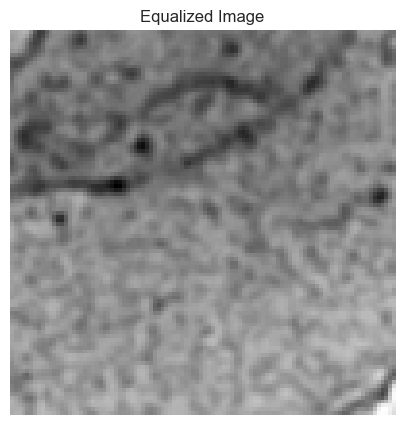

In [8]:
# Plotar as imagens
plot_images(equalized_image.reshape(100,100))

In [9]:
df['image'] = df['path'].apply(preprocess_image)
df

,path,classification,image
0,dataset_converted\ASC-H\11470.png,0,"[112, 120, 122, 128, 134, 128, 129, 133, 134, ..."
1,dataset_converted\ASC-H\11471.png,0,"[135, 135, 134, 139, 148, 144, 137, 135, 136, ..."
2,dataset_converted\ASC-H\11472.png,0,"[156, 165, 170, 176, 180, 181, 157, 151, 158, ..."
3,dataset_converted\ASC-H\7716.png,0,"[142, 138, 123, 104, 96, 98, 102, 108, 106, 10..."
4,dataset_converted\ASC-H\7717.png,0,"[30, 41, 72, 123, 159, 167, 150, 133, 139, 146..."
...,...,...,...
5576,dataset_converted\SCC\8057.png,5,"[37, 32, 22, 18, 17, 16, 17, 19, 20, 20, 19, 1..."
5577,dataset_converted\SCC\8058.png,5,"[136, 146, 154, 157, 148, 148, 164, 161, 149, ..."
5578,dataset_converted\SCC\8126.png,5,"[38, 39, 37, 31, 24, 22, 28, 35, 43, 54, 63, 7..."
5579,dataset_converted\SCC\8127.png,5,"[98, 73, 46, 34, 27, 22, 16, 14, 14, 11, 10, 1..."


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['classification'], test_size=0.2, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)

X_train = np.vstack(X_train.values)
y_train = y_train.values
X_test = np.vstack(X_test.values)
y_test = y_test.values

df_train, X_test, y_test, len(X_test), len(y_test)

(                                                  image  classification
 4957  [69, 69, 64, 58, 56, 56, 57, 55, 54, 51, 48, 5...               4
 1860  [72, 63, 60, 61, 66, 71, 79, 89, 102, 109, 113...               4
 3100  [89, 87, 88, 88, 90, 93, 94, 92, 91, 93, 99, 1...               4
 1988  [107, 108, 111, 123, 134, 134, 128, 118, 111, ...               4
 4041  [191, 190, 191, 191, 192, 195, 193, 193, 193, ...               4
 ...                                                 ...             ...
 3772  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               4
 5191  [46, 48, 50, 51, 54, 56, 57, 59, 60, 60, 64, 7...               4
 5226  [182, 182, 177, 169, 162, 153, 156, 168, 169, ...               4
 5390  [158, 175, 181, 186, 172, 149, 152, 160, 167, ...               4
 860   [184, 181, 168, 162, 164, 169, 180, 178, 170, ...               3
 
 [4464 rows x 2 columns],
 array([[197, 202, 214, ..., 227, 224, 228],
        [176, 176, 179, ..., 201, 201, 200],
      

In [11]:
class_counts = df_train['classification'].value_counts()
min_class_count = class_counts.min()
class_counts, min_class_count

(classification
 4    3413
 3     392
 1     297
 2     227
 5      70
 0      65
 Name: count, dtype: int64,
 65)

# Treinar o modelo SVC

In [32]:
modelo = SVC(max_iter=500,tol=0.000001)

In [13]:
def train_model(model, df_train, iter_p_roll=100, max_iter=1000, class_col='classification', obj_col='image'):
    class_counts = df_train['classification'].value_counts()
    min_class_count = class_counts.min()
    
    modelo.max_iter = iter_p_roll
    n_epoch = max_iter//iter_p_roll
    
    for _ in range(n_epoch):
        balanced_df = pd.concat([
            df_train[df_train['classification'] == cls].sample(min_class_count)
            for cls in range(len(class_counts))
        ])
        balanced_df['tmp'] = balanced_df.apply(lambda x: random.random(), axis=1)
        balanced_df = balanced_df.sort_values('tmp')
        balanced_df = balanced_df.drop('tmp', axis=1)
    
        X = np.vstack(balanced_df['image'].values)
        y = balanced_df['classification'].values
        X,y
        
        model.fit(X,y)

In [33]:
train_model(modelo, df_train, iter_p_roll=500, max_iter=20000)

In [34]:
modelo.fit(X_train, y_train)

/home/kosta/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=500, tol=1e-06)

In [35]:
modelo.score(X_test, y_test)

0.7439570277529096

In [27]:
df['predict'] = df['image'].apply(lambda x: modelo.predict([x])[0])
correct = df.apply(lambda x: x['classification'] == x['predict'], axis=1)
df[correct]

,path,classification,image,predict
487,../dataset_converted/HSIL/7606.png,2,"[29, 28, 32, 45, 76, 105, 119, 138, 162, 177, ...",2
488,../dataset_converted/HSIL/7607.png,2,"[18, 20, 31, 47, 74, 101, 126, 140, 141, 135, ...",2
493,../dataset_converted/HSIL/7665.png,2,"[58, 49, 44, 40, 36, 33, 33, 39, 50, 64, 72, 7...",2
496,../dataset_converted/HSIL/7668.png,2,"[137, 137, 134, 136, 147, 162, 169, 169, 153, ...",2
503,../dataset_converted/HSIL/7700.png,2,"[51, 58, 68, 77, 86, 97, 105, 107, 100, 98, 10...",2
...,...,...,...,...
5497,../dataset_converted/Negative for intraepithel...,4,"[71, 66, 59, 61, 71, 81, 91, 87, 82, 57, 44, 3...",4
5498,../dataset_converted/Negative for intraepithel...,4,"[88, 89, 97, 92, 82, 77, 71, 67, 67, 87, 103, ...",4
5501,../dataset_converted/SCC/7600.png,5,"[28, 29, 29, 33, 36, 39, 44, 50, 54, 59, 63, 6...",5
5518,../dataset_converted/SCC/7730.png,5,"[100, 112, 116, 113, 116, 112, 115, 136, 144, ...",5


In [31]:
import joblib
joblib.dump(modelo, 'modelo_svc.pkl')

['modelo_svc.pkl']

In [37]:
modelo_carregado = joblib.load('modelo_svc.pkl')
modelo_carregado.score(X_test, y_test)

0.7439570277529096

In [ ]:
df['predict'] = df['image'].apply(lambda x: modelo_carregado.predict([x])[0])
correct = df.apply(lambda x: x['classification'] == x['predict'], axis=1)
df[correct]

# Obtendo métricas e gráficos

In [21]:
modelo = joblib.load('app/inteligencia/svm.pkl')

In [22]:
predicoes = modelo.predict(X_test)

In [23]:
label_mapping = {0:'ASC-H', 1:'ASC-US', 2:'HSIL', 3:'LSIL', 4:'Negative for intraepithelial lesion', 5:'SCC'}
labels = [label_mapping[i] for i in range(len(label_mapping))]

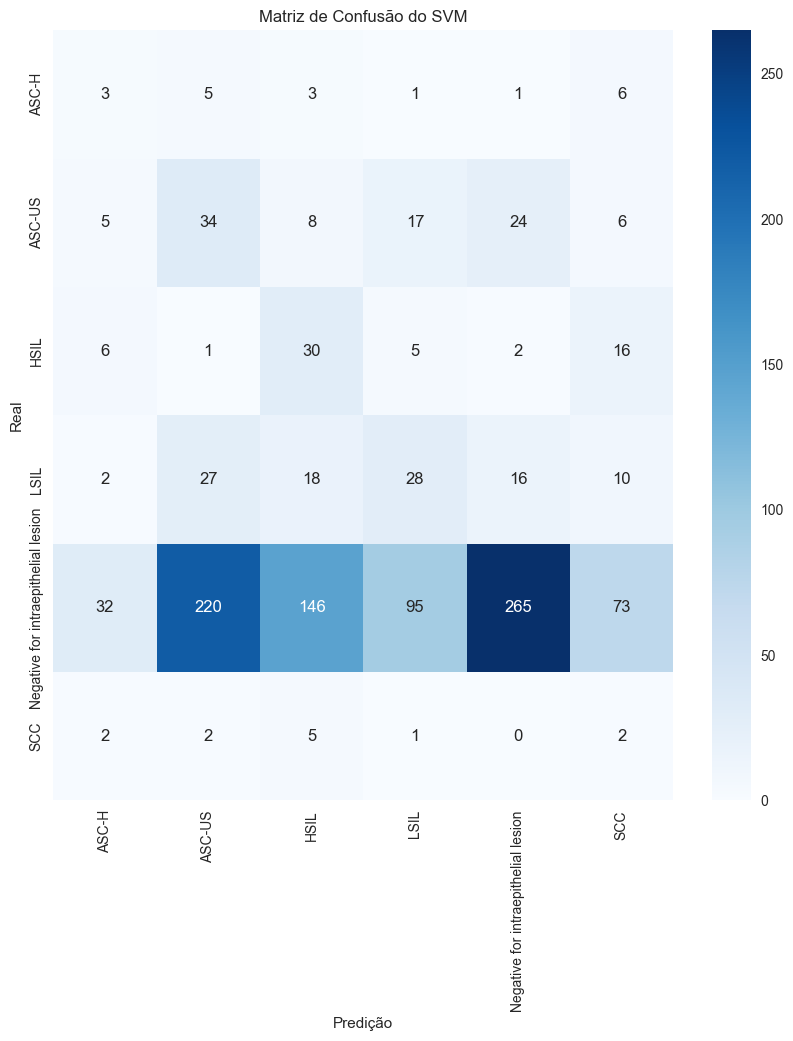

In [24]:
matriz_confusao = confusion_matrix(y_test, predicoes)
plt.figure(figsize=(10, 10))
seaborn.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão do SVM')
plt.show()

In [25]:
def obter_metricas(matriz_confusao: numpy.ndarray, y: numpy.ndarray) -> list[dict]:
    """
    Obtém de uma matriz de confusão todas as métricas.
    :param matriz_confusao: Matriz de confusão do tipo Numpy NDArray (como o retornado pela função sklearn.metrics.multilabel_confusion_matrix). 
    :return: Dicionário com todas as métricas utilizadas.
    """
    ordem_atributo_saida = []
    for i in y:
        if not i in ordem_atributo_saida:
            ordem_atributo_saida.append(i)

    metricas = []
    for indice, elemento in enumerate(matriz_confusao):
        vn, fp, fn, vp = elemento.ravel()
        tvp = vp / (vp + fn)
        tvn = vn / (vn + fp)
        tfp = fp / (fp + vn)
        tfn = fn / (fn + vp)
        precisao = vp / (vp + fp)
        sensibilidade = vp / (vp + fn)
        acuracia = (vp + vn) / (vp + vn + fp + fn)
        f_measure = 2*precisao*sensibilidade/(precisao + sensibilidade)
        metricas.append({
            'Classe': ordem_atributo_saida[indice],
            'VN':vn,
            'FP': fp,
            'FN': fn,
            'VP': vp,
            'TVP': tvp,
            'TVN': tvn,
            'TFP': tfp,
            'TFN': tfn,
            'PR': precisao,
            'SENS': sensibilidade,
            'AC': acuracia,
            'FM': f_measure
        })
    return metricas

In [26]:
matriz_de_confusao = sklearn.metrics.multilabel_confusion_matrix(y_test, predicoes)

In [27]:
metricas = obter_metricas(matriz_de_confusao, y_test)

In [28]:
def calcular_medias_metricas(metricas: list):
    """
    Calcula a média de todas as métricas.
    :param metricas: Lista de dicionários com as métricas.
    :return: Dicionário com a média de todas as métricas.
    """
    quantidade_classes = len(metricas)

    # Somando todas as métricas
    media = {}
    for classe_i in metricas:
        for chave_metrica_j_classe_i in classe_i.keys():
            if chave_metrica_j_classe_i != 'Classe':
                if not chave_metrica_j_classe_i in media:
                    media[chave_metrica_j_classe_i] = 0
                media [chave_metrica_j_classe_i] += classe_i[chave_metrica_j_classe_i]

    # Dividindo as métricas pelo número de classes
    for chave in media.keys():
        media[chave] /= quantidade_classes

    return media

In [29]:
calcular_medias_metricas(metricas)

{'VN': 805.0,
 'FP': 125.83333333333333,
 'FN': 125.83333333333333,
 'VP': 60.333333333333336,
 'TVP': 0.29706402567682677,
 'TVN': 0.8616177719137162,
 'TFP': 0.13838222808628386,
 'TFN': 0.7029359743231732,
 'PR': 0.23151151959845348,
 'SENS': 0.29706402567682677,
 'AC': 0.7746941211578632,
 'FM': 0.20164189067018104}